# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Topic: Some (Very) Brief Notes on Estimation and Confidence Intervals__ <br>

Author:  Tyler J. Brough <br>
Updated: October 7, 2021 <br>

---

<br>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
np.random.seed(7)

---

<br>

## __Estimation__

<br>

These notes are based upon readings from the following books:

* _Introduction to Probability and Mathematical Statistics_ by Bain & Engelhart

* _Mathematical Statistics with Applications_ by Wackerly, Mendenhall, and Scheaffer

* _Statistics for Business and Economics_ by McClave, Benson, and Sincich

<br>

### __Estimator__

---

A statistic, $T = \mathscr{t}(X_{1}, X_{2}, \ldots, X_{n})$, that is used to estimate the value of $\tau(\theta)$ is called an __estimator__ of $\tau(\theta)$, and an observed value of the statistic, $t = \mathscr{t}(x_{1}, x_{2}, \ldots, x_{n})$, is called an __estimate__ of $\tau(\theta)$.

---

<br>
<br>

There are different methods of estimation. Among these, a few of the most common are: 

1. ___The Method of Moments___

2. ___The Method of Maximum Likelihood___

3. ___Bayes and Minimax Estimators___

<br>

To be brief, we will not discuss the first or the third here in detail. We will discuss Bayesian estimation as a separate topic. 

<br>
<br>

<br>

## __Confidence Intervals__

<br>

### __Confidence Interval__

---

__Confidence Interval__ An interval ($\mathscr{l}(x_{1}, x_{2}, \ldots, x_{n})$, $\mathscr{u}(x_{1}, x_{2}, \ldots, x_{n})$) is called a $\mathbf{100 \gamma\%}$ __confidence interval__ for $\theta$ if

<br>

$$
P[\mathscr{l}(X_{1}, X_{2}, \ldots, X_{n}) < \theta < \mathscr{u}(X_{1}, X_{2}, \ldots, X_{n})] = \gamma
$$

<br>

where $0 < \gamma < 1$. The observed values $\mathscr{l}(x_{1}, x_{2}, \ldots, x_{n})$ and $\mathscr{u}(x_{1}, x_{2}, \ldots, x_{n})$ are called __lower__ and __upper confidence limits__, respectively.

---

<br>

<u><b>Example 1</b></u>

<br>

Consider a random sample from a normal distribution, $X_{i} \sim
N(\mu, \sigma^{2})$, where $\sigma^{2}$ is assumed to be known. In
this case $\bar{X}$ is sufficient for $\mu$, and it is known that
$Z = \sqrt{n}(\bar{X} - \mu)/\sigma \sim N(0,1)$. By symmetry, we also
know that $z_{\alpha/2} = -z_{\alpha/2}$, and thus

<br>

$$
\begin{aligned}
1 - \alpha &= P[-z_{1 - \alpha/2} < \sqrt{n}(\bar{X} - \mu)/\sigma < z_{1 - \alpha/2}] \\
           & \\
           &= P[\bar{X} - z_{1 - \alpha/2}\frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{1 - \alpha/2}\frac{\sigma}{\sqrt{n}}]
\end{aligned}                  
$$

<br>

It follows that a $100(1-\alpha)\%$ confidence interval for $\mu$ is given by 

<br>

$$
(\bar{x} - z_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{x} + _{1-\alpha/2}\frac{\sigma}{\sqrt{n}})
$$

<br>

For example, for a $95\%$ confidence interval, $1 - \alpha/2 = 0.975$ and the upper and lower confidence limits are $\bar{x} \pm 1.96 \frac{\sigma}{\sqrt{n}}$.

<br>


In [3]:
α = 0.05 / 2.
print(f"{stats.norm.ppf(1 - α) : 0.2f}")

 1.96


In [4]:
print(f"{stats.norm.cdf(1.96) : 0.3f}")

 0.975


<br>

Let's simulate a sample from a $N(10, 4)$ distribution and calculate the mean and a $95\%$ confidence interval. Assume that the variance of $4$ is known.

<br>

In [5]:
n = 100
x = np.random.normal(loc=10, scale=4, size=n)

In [6]:
x̄ = np.mean(x) ## type: `x\bar` and hit tab
x̄ 

10.048261698070942

In [7]:
(x̄ - 1.96 * np.sqrt(4)/np.sqrt(n), x̄ + 1.96 * np.sqrt(4)/np.sqrt(n))

(9.656261698070942, 10.440261698070941)

<br>

#### __Large Sample Confidence Intervals ($\sigma$ Unknown)__

<br>

<u><b>Example 2</b></u>

<br>

The shopping times of $n = 64$ randomly selected customers at a local supermarket were recorded. The average and variance of the 64 shopping times were 33 minutes
and 256, respectively. Estimate $\mu$, the true average shopping time per customer, with a confidence interval of $1 - \alpha = 0.90$.

<br>

<u><b>Solution</b></u>

<br>

We are interested in the parameter $\mu$. Thus $\hat{\mu} = \bar{x} = 33$ and $s^{2} = 256$ for a sample of $n = 64$ shopping times. The population variance 
$\sigma^{2}$ is unknown, so we use $s^{2}$ as its estimated value. The confidence interval 

<br>

$$
\hat{\mu} \pm z_{1-\alpha/2} \sigma_{\hat{\mu}}
$$

<br>

has the form

<br>

$$
\bar{x} \pm z_{1-\alpha/2}\left(\frac{\sigma}{\sqrt{n}}\right) \approx \bar{x} \pm z_{1-\alpha/2}\left(\frac{s}{\sqrt{n}}\right)
$$

<br>

In [8]:
α = 0.1 / 2.
print(f"\n{stats.norm.ppf(1. - α) : 0.3f}\n")


 1.645



<br>

$$
\begin{aligned}
\bar{x} - z_{1-\alpha/2} \left(\frac{s}{\sqrt{n}}\right) &= 33 - 1.645 \left(\frac{16}{8}\right) = 29.71 \\
&\\
\bar{x} + z_{1-\alpha/2} \left(\frac{s}{\sqrt{n}}\right) &= 33 + 1.645 \left(\frac{16}{8}\right) = 36.29 \\
\end{aligned}
$$

<br>

In [9]:
x̄ = 33 
s = 16
n = 64

In [10]:
z = stats.norm.ppf(1. - α)
(x̄ - z * s / np.sqrt(n), x̄ + z * s / np.sqrt(n))

(29.710292746097057, 36.28970725390295)

<br>
<br>

<u><b>Example 3</b></u>

Consider a large bank that wants to estimate the average amount of money owed by its delinquent debtors, $\mu$. The bank randomly selects $n = 100$ of its
delinquent accounts and finds that the sample mean amount owed is $\bar{x} = \$230$. Also, suppose it is known that the standard deviation of the amount
owed for all deliquent accounts is $\sigma = \$90$. Calculate a $95\%$ confidence interval for the target parameter, $\mu$.

<br>

<u><b>Solution</b></u>

Substituting $\bar{x} = 230$ and $\sigma = 90$ into the interval estimator formula, we obtain:

<br>

$$
\large{\bar{x} \pm 1.96 \sigma_{\bar{x}} = \bar{x} \pm (1.96) \sigma / \sqrt{n} = 230 \pm (1.96) (90 / \sqrt{100}) = 230 \pm 17.64}
$$

<br>

Or $\mathbf{(212.36, 247.64)}$. 

<br>

In [11]:
n = 100
x̄ = 230
σ = 90

In [12]:
α = 0.05 / 2.
z_val = stats.norm.ppf(1 - α)
(x̄ - z_val * (σ / np.sqrt(n)), x̄ + z_val * (σ / np.sqrt(n)))

(212.36032413913952, 247.63967586086048)

<br>

This example is almost surely unrealistic because it is very doubtful that the large bank knows the true population standard deviation. Therefore, it must also estimate using the sample standard deviation as an estimator and plug it in. 

<br>

Let's simulate some fake data from this distribution and see what this would look like.

<br>

In [13]:
x = np.round(np.random.normal(loc=230, scale=90, size=n))

In [14]:
x̄ = np.mean(x)
s = np.std(x, ddof=1)
(x̄, s)

(223.85, 86.7768966832751)

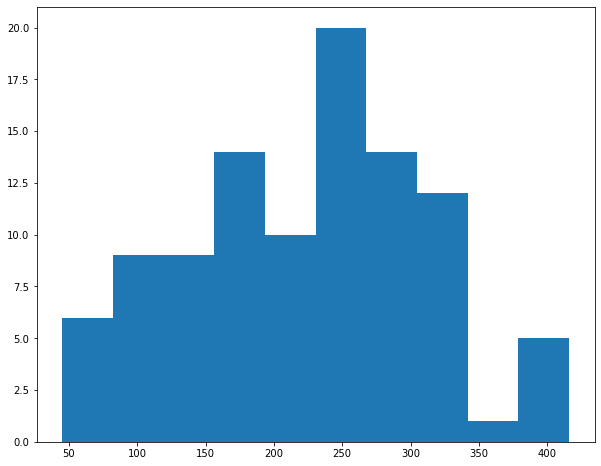

In [15]:
plt.hist(x);

In [16]:
α = 0.05 / 2.
z_val = stats.norm.ppf(1 - α)
(x̄ - z_val * (s / np.sqrt(n)), x̄ + z_val * (s / np.sqrt(n)))

(206.84204078106274, 240.85795921893725)

<br>

### __Large Sample 100$\mathbf{\gamma\%}$ Confidence Interval for $\mathbf{\mu}$, Based on a Normal ($z$) Statistic__

---

<br>

$$
\begin{aligned}
\sigma \mbox{  known:} \quad \bar{x} \pm (z_{1 - \alpha/2}) \sigma_{\bar{x}} &=  \bar{x} \pm (z_{1 - \alpha/2}) \left(\frac{\sigma}{\sqrt{n}}\right) \\
& \\
\sigma \mbox{ unknown:} \quad \bar{x} \pm (z_{1 - \alpha/2}) \sigma_{\bar{x}} &\approx  \bar{x} \pm (z_{1 - \alpha/2}) \left(\frac{s}{\sqrt{n}}\right) \\
\end{aligned}
$$

<br>

where $z_{1 - \alpha/2}$ is the $z$-value corresponding to an area $\frac{\alpha}{2}$ in the tail of a standard normal distribution. $\sigma_{\bar{x}}$ is the
standard error (the standard deviation of the sampling distribution) of $\bar{x}$, $\sigma$ is the standard deviation of the population, and $s$ is the sample standard deviation.

---

<br>

<br>

### __Conditions Required for a Valid Large-Sample Confidence Interval for $\mathbf{\mu}$__


---

__1.__ A random sample is selected from a target population.

__2.__ The sample size $n$ is large (i.e. $n \ge 30$). Due to the Central Limit Theorem
       this condition guarantees that the sampling distribution of $\bar{X}$ is approximately
       norml. (Also, for large $n$, $s$ will be a good estimator for $\sigma$.)
      

---

<br>

<br>

### __Interpretation of a Confidence Interval for a Population Mean__

---

When we form a $100\gamma\%$ confidence interval for $\mu$, we usually express our confidence in the interval with a statement such as "We can be $100\gamma\%$ confident that $\mu$ lies between the lower and upper bounds of the confidence interval."

* For a particular application we substitute the appropriate numerical values for the estimated
  mean and lower and upper bounds
  
* _The statement reflects our confidence in the estimation process rather than in the particular 
  interval that is calculated from the sample data._
  
* __THIS IS NOT A PROBABILITY INTERVAL!!!__

* Rather it is a statement about repeated sampling. 

* A $100\gamma\%$ confidence interval contains the true parameter value with probability 
  $100\gamma$ only _before_ one has seen the data. After the data has been seen, the 
  probability is zero or one.
  
* Yet confidence intervals are universally interpreted in practice as guides to _post_-sample
  uncertainty.
  
* They often are reasonable guides, but only because they often are close to posterior
  probability intervals that would emerge from a Bayesian analysis.

---

<br>

<br>

### __Small-Sample Confidence Interval for $\mathbf{\mu}$, Student's $t$-Statistic__

---

$$
\large{\bar{x} \pm t_{1-\alpha/2} \left(\frac{s}{\sqrt{n}}\right)}
$$

<br>

where $t_{1 - \alpha / 2}$ is the $t$-value corresponding to an area $\frac{\alpha}{2}$ in the upper tail of the student's $t$-distribution based on $\nu = n - 1$ degrees of freedom.

---

<br>

<br>

<u><b>Example 4</b></u>

Some quality-control experiments require _destructive sampling_ (i.e., the test to determine
whether the item is defective destroys the item) in order to measure some particular 
characteristic of the product. The cost of destructive sampling often dictates small samples.
For example, suppose a manufacturer of printers for personal computers wishes to estimate
the mean number of characters printed before the printhead fails. Suppose the printer
manufacturer tests $n = 15$ randomly selected printheads and records the number of 
characters printed until failure for each. These measurements (in millions of characters)
are given in the table below

<br>

|      |      |      |      |      |
|------|------|------|------|------|
| 1.13 | 1.55 | 1.43 | 0.92 | 1.25 |
| 1.36 | 1.32 | 0.85 | 1.07 | 1.48 |
| 1.20 | 1.33 | 1.18 | 1.22 | 1.29 |

<br>

Form a $99\%$ confidence interval for the mean number of characters printed before the
printhead fails. Interpret the results.

<br>

In [17]:
x = np.array([1.13, 1.55, 1.43, 0.92, 1.25, 
              1.36, 1.32, 0.85, 1.07, 1.48,
              1.20, 1.33, 1.18, 1.22, 1.29])

In [20]:
n = len(x)
x̄ = np.mean(x)
s = np.std(x, ddof=1)
(n, x̄, s)

(15, 1.2386666666666666, 0.19316412956959936)

In [23]:
α = 0.01 / 2.
γ = 1. - α
ν = n - 1
t_val = stats.t(ν).ppf(γ)

In [24]:
t_val

2.97684273411266

In [25]:
z_val = stats.norm.ppf(γ)

In [26]:
z_val

2.5758293035489004

In [27]:
(x̄ - t_val * (s / np.sqrt(n)), x̄ + t_val * (s / np.sqrt(n)))

(1.090197338451367, 1.3871359948819662)

In [40]:
## Computational Experiment to Compare Normal to Student's t
γ = 0.95

for i in range(1, 50):
    print(f"({i}, {stats.norm.ppf(γ) : 0.4f}, {stats.t(i).ppf(γ) : 0.4f})")

(1,  1.6449,  6.3138)
(2,  1.6449,  2.9200)
(3,  1.6449,  2.3534)
(4,  1.6449,  2.1318)
(5,  1.6449,  2.0150)
(6,  1.6449,  1.9432)
(7,  1.6449,  1.8946)
(8,  1.6449,  1.8595)
(9,  1.6449,  1.8331)
(10,  1.6449,  1.8125)
(11,  1.6449,  1.7959)
(12,  1.6449,  1.7823)
(13,  1.6449,  1.7709)
(14,  1.6449,  1.7613)
(15,  1.6449,  1.7531)
(16,  1.6449,  1.7459)
(17,  1.6449,  1.7396)
(18,  1.6449,  1.7341)
(19,  1.6449,  1.7291)
(20,  1.6449,  1.7247)
(21,  1.6449,  1.7207)
(22,  1.6449,  1.7171)
(23,  1.6449,  1.7139)
(24,  1.6449,  1.7109)
(25,  1.6449,  1.7081)
(26,  1.6449,  1.7056)
(27,  1.6449,  1.7033)
(28,  1.6449,  1.7011)
(29,  1.6449,  1.6991)
(30,  1.6449,  1.6973)
(31,  1.6449,  1.6955)
(32,  1.6449,  1.6939)
(33,  1.6449,  1.6924)
(34,  1.6449,  1.6909)
(35,  1.6449,  1.6896)
(36,  1.6449,  1.6883)
(37,  1.6449,  1.6871)
(38,  1.6449,  1.6860)
(39,  1.6449,  1.6849)
(40,  1.6449,  1.6839)
(41,  1.6449,  1.6829)
(42,  1.6449,  1.6820)
(43,  1.6449,  1.6811)
(44,  1.6449,  1.680